<a href="https://colab.research.google.com/github/negarhonarvar/SAT-optimized-solver/blob/main/SAT-SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
!pip install python-sat
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.6 MB/s eta 0:00:00


In [2]:
from pysat.formula import CNF
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading the CNF File

In [10]:
def read_cnf_file(file_path):
    formula = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('c') or line.startswith('p') or line.strip() == '':
                continue

            temp_list = line.split()
            if len(temp_list) > 0 and temp_list[-1] == '0':
                temp_list = temp_list[:-1]  # Remove the trailing 0

            clause = []
            for literal in temp_list:
                num = int(literal)
                clause.append((abs(num), 1 if num > 0 else 0))  # 1 for TRUE, 0 for FALSE

            formula.append(clause)

    return formula

# Fitness Calculation

In [4]:
def number_of_true(clauses):
    true_count = 0
    for clause in clauses:
        if any(literal[1] == 1 for literal in clause):  # Check if any literal is TRUE
            true_count += 1
    return true_count

# Noise Creation

In [5]:
def create_noise(sample):
    new_sample = sample.copy()
    clause_index = random.randrange(len(new_sample))  # we pick a random clause
    literal_index = random.randrange(3)  # then a random literal in the clause

    # flipping  the truth value of the chosen literal
    clause = list(new_sample[clause_index])
    clause[literal_index] = (clause[literal_index][0], 1 - clause[literal_index][1])
    new_sample[clause_index] = tuple(clause)

    return new_sample

# Acceptance Probability Function

In [6]:
def check_second_chance(current_fitness, new_fitness, T):
    delta_f = new_fitness - current_fitness
    if delta_f > 0:
        return True
    else:
        return random.uniform(0, 1) < math.exp(delta_f / T)

# Simulated Annealing

In [7]:
def simulated_annealing(cnf_formula, initial_temp, cooling_rate, max_iters):
    T = initial_temp
    sample = read_cnf_file(cnf_formula)

    current_fitness = number_of_true(sample)
    best_solution = sample
    best_fitness = current_fitness

    itr_list = []
    fitness_list = []

    for i in range(1, max_iters + 1):
        itr_list.append(i)

        new_sample = create_noise(sample)
        new_fitness = number_of_true(new_sample)

        if new_fitness > current_fitness or check_second_chance(current_fitness, new_fitness, T):
            sample = new_sample
            current_fitness = new_fitness

        if new_fitness > best_fitness:
            best_solution = new_sample
            best_fitness = new_fitness


        T *= cooling_rate

        fitness_list.append(current_fitness)

        if best_fitness == len(sample):
            break

    plt.plot(itr_list, fitness_list)
    plt.title('Simulated Annealing Optimization Progress')
    plt.xlabel('Iteration')
    plt.ylabel('Number of Satisfied Clauses')
    plt.show()

    return best_solution, best_fitness

Main

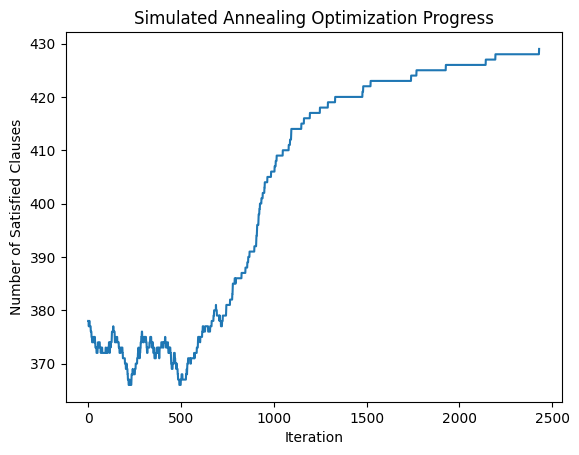

Best fitness found: 429


In [11]:
initial_temp = 1000
cooling_rate = 0.99
max_iters = 10000

# Replace this with your Google Drive path or other input source
path = '/content/drive/MyDrive/Colab Notebooks/Input.cnf'

best_solution, best_fitness = simulated_annealing(path, initial_temp, cooling_rate, max_iters)

print(f"Best fitness found: {best_fitness}")
